# ベイズ推論

## UCB

多腕バンディット問題は、ジレンマを抱えた問題であった。
いろんなスロットマシンを引いてみないと、どれがいいスロットマシンか分からない。いいスロットマシンだと思ったら、それを優先的に引くべきだが、今までの結果がたまたまかもしれないので、今まで調子が悪かったらといって、全く顧みないのでは良くない。この
多腕バンディット問題に対して、十分にいい解を、十分に小さい計算時間で与える方法として、**UCB1** (Upper Confidence Bound) という戦略が知られている(Auer et.al.,2002)。

これは、それぞれのマシンについて次の値を計算し、それが最大になるマシンを選ぶというものである。
$$\overline{X_j} + c \sqrt{\frac{2\log n}{n_j}}.
$$
ここで、$n$ は今までの試行の回数、$n_j$ はその中でマシン j を引いた回数、$\overline{X_j}$ はこれまでの結果から分かっているマシン j の期待値である。$c$ は何らかの定数で、これが大きいほど、他の選択肢も頻繁に見ることになる。

この UCB 法を木探索に拡張した，UCT (UCB applied to Trees) は，**MCTS** (Monte-Carlo Tree Search) という形で，
囲碁などのゲームプログラムで用いられている。

**練習問題**
UCB アルゴリズムを実現した戦略を作ってみよう。

## 様々な確率密度関数に従う乱数

バンデッド問題では，それぞれのスロットマシンの持つ確率 p の値を推測する必要があった。
p (これ自身が確率を意味するのでややこしいが) のように，値がわからないもので，それがどういう値である値かが
確率的にしかわからないものを，**確率変数**という。p は実数なので，これが 0.7 である確率といったものは存在しない。
ある範囲にある確率を考えることになる。このように，
確率変数のとる値は，離散値の場合と連続値（実数）の場合があるが，ここでは，
値として実数をとる場合について考える。

確率変数が実数値をとる場合に，確率変数 x がちょうどある値(たとえば 0.5) を
とる確率を考えるのは多くの場合無意味であり，ある範囲の値 (たとえば 0.3 
から 0.5) をとる確率というのを考える。乱数が一様であればその確率は区間の
長さに比例するが，ここでは乱数が一様ではなく，
非負の値をとる関数 f(x) に従った分布をとる場合を考える。
f(x) をこの分布の**確率密度関数**という。
f(x) がその上では 0 以外の値をとるような集合のことを f の台集合という。

確率密度関数 f に従う確率変数 x が 0.3 から 0.5 の値をとる確率は，次
のように積分で求められる。
$$
P(0.3 \leq x \leq 0.5) = \int_{0.3}^{0.5} f(x) dx
$$
f(x) は，台集合全体で積分すると，全体確率である 1 とならなくてはならない。

[-1, 1] の一様乱数の場合には，確率密度関数は， f(x) = 0.5 という定数関数である。

様々な確率分布に従う乱数を発生させて（サンプリング）分布を可視化して
みよう。乱数を発生させる関数を，next() という，[-1, 1] の実数値を返すメソッドを持つ
オブジェクトとして考えよう。
例えば，次のようにして，一様乱数オブジェクトを作ることができる。
next() メソッドを適用するなどして，乱数などを発生させる
オブジェクトに対して，その値を取り出すことを**サンプリング**という。このプログラムでは，
一様乱数オブジェクトを生成して，10回サンプリングを行っている。

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

class Uniform:
    def next(self):
        return random.uniform(-1,1)
#        return np.random.rand()*2-1  
    
m = Uniform()
for i in range(10):
    u = m.next();
    print(f"{u:2.2f}")
    

-0.70
0.65
0.35
-0.77
0.89
0.22
0.65
-0.20
-0.30
-0.84


**練習問題**
[-1 1] 上の乱数オブジェクト f と自然数 n, それに，[-1, 1] を幾つに分割するかを表す数　k を引数にとり，n 回サンプリングして，そのサンプリングから近似的に分かる
確率密度関数を表示する関数 sample(f, n)を作成しよう。

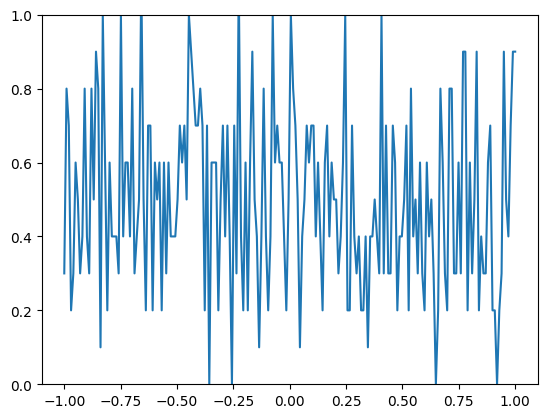

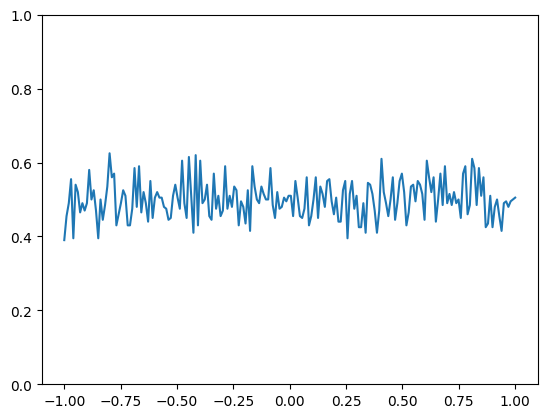

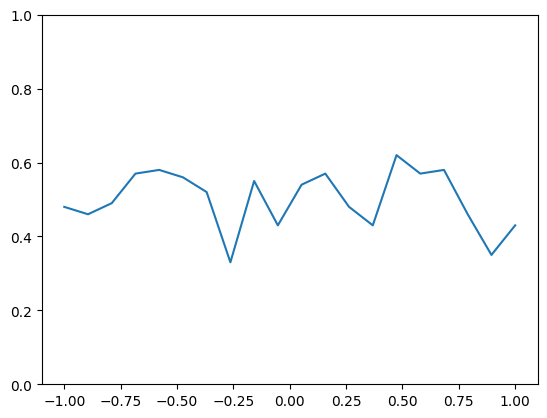

In [7]:

def sample(f, n, k=200):
    "f : 関数，n : 回数, k : 分割する個数"
    x = np.linspace(-1, 1, k)  
    y = np.zeros((k,))
    for i in range(n):
        xx = f.next()
        if(-1 < xx < 1):  # 範囲外の乱数は無視する
            y[(int)((xx + 1)*(k//2))] += 1
    y = y*k/n/2  # 2 は，全体の幅 正規化を行なっている。
    fig, ax = plt.subplots()
    ax.set_ylim(0,1)    
    ax.plot(x,y)
    plt.show()
    
m = Uniform()
sample(m, 1000, 200)    
sample(m,20000, 200)
sample(m, 1000, 20)    


matplotlib の hist は，与えられたリストの頻度をヒストグラムとして表示してくれる (bins は，いくつに分割するか)。
さらに，density = True を与えると，正規化（積分値を1）してくれる。よって，
次のように書いても同じものが得られる。

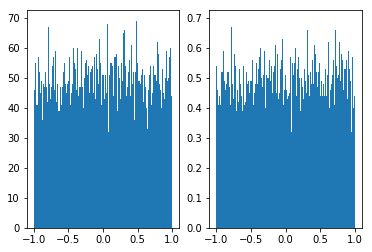

In [21]:
m = Uniform()
y = []
for i in range(10000):
    y.append(m.next())

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)  #1,2,1 と 1,2,2 は，2つの図を横に並べる
ax2 = fig.add_subplot(1,2,2)
ax1.hist(y, bins=200)
ax2.hist(y, bins=200, density=True)  # 縦軸に注目，
plt.show()

更に，matplotlib の乱数発生関数 np.random.rand は，引数で与えられた大きさの[0,1] の乱数の配列を返してくれる。
よって，次のようにしても同じ効果が得られる。


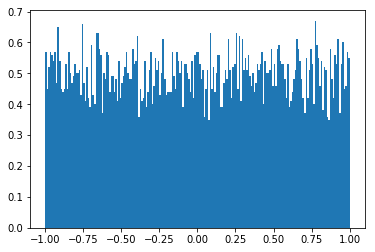

In [23]:
y = np.random.rand(10000)*2-1
fig, ax1 = plt.subplots()
ax1.hist(y, bins=200, density=True)
plt.show()

次の確率密度関数 $f(x)$ に従う分布をガウス分布（あるいは正規分布）という。
$$
f(x)={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}
\exp \!\left(-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}\right)
$$
この分布の平均は $\mu$ であり，分散は $\sigma^2$ （後述）となる。

**練習問題**
random ライブラリに存在する np.random.randn は，平均が 0, 分散が 1 の
ガウス分布に基づく乱数を生成する。（使い方は自分で調べよう。）
これをサンプリングして表示しよう。その上に，このグラフを書いてみよう。

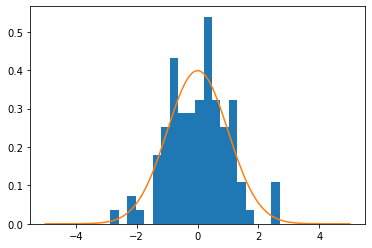

In [4]:
y = np.random.randn(100)
fig, ax1 = plt.subplots()
ax1.hist(y, bins=20, density=True)
x = np.linspace(-5, 5, 200)  # 200 に分割
z = np.exp(-x**2/2)/np.sqrt(2*np.pi)
ax1.plot(x,z)
plt.show()

**練習問題** 上の式から，平均や分散の値を変える方法を考えよう。
平均が 0.5,  分散が 0.2 のガウス分布を生成し，サンプリングして，確率密度関数を描いてみよう。
余裕があれば，Box-Muller法について勉強して，自分でガウス分布を生成するプログラムを書いてみよう。


次の値を確率密度関数 $f(x)$ をもつ確率変数 $x$ の期待値(あるいは，平均値）という。
$$
\mu = \int_{-\infty}^{\infty} xf(x) dx
$$

また，$(x-\mu)^2$ の期待値、すなわち
$$
\mu = \int_{-\infty}^{\infty} (x-\mu)^2f(x) dx
$$
のことを、分散($\sigma^2$ という記号で書くことが多い)
といい，その平方根 $\sigma$ のことを標準偏差という。分散は，平均値の周りにどれくらい固まって分散しているかを表す。

[a,b] の一様分布の平均が $\frac{a+b}{2}$, 分散が $\frac{(b-a)^2}{12}$ であることを計算で確かめよう。ガウス分布の場合，$\mu$ が平均であり，$\sigma^2$ が分散となる。数学の得意な人は，チャレンジしてほしい。

## 大数の法則と中心極限定理

確率密度関数 $f$ に従う乱数に対して何回もサンプリングを行いその平均値をとる。すると，サンプリングの回数を多くするに従い，平均値はこの $\mu$ に近づいていくことが知られている。これを，大数の法則という。

**練習問題** $[-1, 1] $ の一様乱数 n 個の平均をとろう。100 回行い，その平均と分散を求めよう。



大数の法則によって，乱数をサンプリングして平均値をとると，その確率分布の平均に近づくと述べたが，
その値も同じ値をとる訳ではなく、実験のたびに確率的な値をとっていた。その分布は，回数を増やすとガウス分布に近づいていくことが知られている（中心極限定理）。このことを，実験的に確かめてみよう。

**練習問題** 上の練習問題のプログラムで，$n = 2, 3, ...$ と $n$ を増やした時の分布の変化をみてみよう。

元の乱数が一様乱数でなくても，元の乱数の平均が $\mu$, 分散が $\sigma^2$ なら，
$n$ 個の平均でできる乱数は，平均が $\mu$, 分散が $\sigma^2/n$ のガウス分布に近づくことが知られている。
いろんな乱数の和をとり，そのことを確認しよう。

## 任意の確率密度関数に従う乱数

非負値をとる関数 $f$ を任意に与えて，それを確率密度関数とする
乱数は作れるだろうか(ここでは、$f$ の可測性などの議論はしない)。$f$ の台の上での積分は 1 でないといけないので，与えられた関数に対して，それを正規化した関数，すなわち，その積分値で割ってできた関数を確率密度関数とする乱数の発生器を考えることにする。まず，自分で考えてみよう。

確率密度関数 $f$ に従う確率変数 $x$ に対して，$\lambda a. P(x \leq a)$ という関数（すなわち，a をもらい，x の値が a 以下である確率を返す関数）を x の**累積分布関数**という。累積分布関数は積分なので、近似的に求めることができる。すなわち，確率変数 x のとりうる値の範囲 [xmin, xmax ] を細かく等分し（たとえば，$2^{16}$等分），その大きさの配列に，f(x) の値を足し込むように代入していけばよい。それに対し，求める乱数は，[0,1] の一様な乱数 y に対し，この累積分布関数の逆関数を適用してやれば作ることができる。

まず，このような計算に基づかなくても計算的に累積分布関数の逆関数を求められる関数として，指数関数を考えよう。


次の確率密度関数 $f(x)$ に従う分布を指数分布という。
$$
  f(x)= \left \{
    \begin{array}{ll}
\lambda e^{- \lambda x}  &(x \geq 0)\\
0  &(x \leq 0)
    \end{array}
    \right.
$$

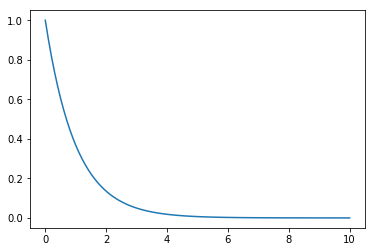

In [25]:
x = np.linspace(0, 10,100)
lam = 1
y = lam * np.exp(-lam * x)
fig, ax1 = plt.subplots()
ax1.plot(x,y)

積分をすれば，この積分が 1 でありこれが確率密度関数であること，
部分積分を行えば，この分布の平均が $\lambda$ であること
が分かる。また，累積分布関数は，
$$
f(x)=1- e^ {-\lambda x}
$$
となる。これより，その逆関数は，
$$
g(y)= -\frac{\log(1-y)}{\lambda}
$$
である。
指数分布に従う乱数発生器 Exponential を作成しよう。

# ベイズの定理

我々は，まだ知らない事柄に対して，予測をたてて，その予測を修正しながら生活している。
余程自信がある人とか，先入観に固まっている人でなければ，
予測は，1つの値として立てるのではなく，確率分布としてたてるだろう。
天気予報は，雨の確率 30% というが，晴れと雨が 7:3 という単純なものではなく，天気は連続的であり，その分布も連続的である。
明日の天気も，1 年後の株価の予測も，麻雀の勝ち具合も，彼女の気持ちも，確率分布として考え，
それを，新しい情報が入るたびに更新していくものだろう。
いずれも，これから説明することほど単純ではないだろうが。
そのような，予測値の確率分布を更新する方法を与えているのが，ベイズの定理である。

## 確率変数が離散値をとるとき

まず，離散な場合を考える。
$H$ という事象が起きる確率 $P(H)$ を，
$D$ という事象が起きたという情報をもとに更新することを考える。
ベイズの定理によれば，$D$ が起きたということが分かった元での $H$ の確率
$P(H | D)$ は，次の様に計算できる。
$$
P(H | D) =  \frac{P(D | H)}{P(D)} P(H)
$$
ここで，$P(H)$ は，$D$ であることが分かる前の段階での確率分布で，事前分布と呼ばれる。
$P(D | H)$ は，実際に $H$ だとした時に，$D$ が起きる確率で，尤度(ゆうど，likehood function) という。

有名な，モンティ・ホール問題という問題で説明しよう。
3つの箱の中に一つだけあたりが隠されており，解答者が一つの箱を選ぶ。すると，司会者が，残りの箱の中の一つをあけて，それがはずれであることを解答者に示す。それを見て，解答者は自分の選択を変更することができる。はたして変更した方がいいかどうかという問題である。

解答者がはずれの箱を選んだときには、司会者が開く箱は一意に定まる。解答者が当たりの箱を選んだときには、司会者は、残りの 2 つの箱を 1/2 の確率で開くことにする。

箱を A, B, C とし，当たり箱を $x$ とする。
解答者が C と答えたとしよう。そして，司会者が A の箱を選んであけたとしよう。
(当然，はずれのはずである。)
この，司会者が A の箱を選んであけるという事象を D とする。
D が起きる前の解答者の予測値の確率分布は，P(x=A) = P(x=B) = P(x=C)  = 1/3である。
$P(x=A|D)$ は，A がはずれであると分かった後の　A が当たりである確率なのだから，当然 0 である。問題は，$P(x=B|D)$ と $P(x=C|D)$ である。ベイズの定理から，
$$
P(x=B | D) =  \frac{P(D | x=B) P(x=B)}{P(D)}
$$
である。$P(D|x=B)$ は，$B$ が当たりである時に 司会者が A を開ける確率で，
それは，100 \% のはずだ。
また，$P(D)$ は，A か B かどちらを開けるかなので 1/2 だ。
（これが気持ち悪い人は，  $$P(D) = P(D|x=A)P(x=A) + P(D|x=B)P(x=B) + P(D|x=C)P(x=C)$$と考えよう。)
これを上に当てはめると $P(x=B | D) =  2/3$ と分かる。
同様に計算すると，$P(x=C|D) = 1/3$ である。よって，
A, B, C が当たりの確率は， (1/3, 1/3, 1/3) から (0, 2/3, 1/3) に更新されたことになる。
当然，B に変えた方が，当たる確率は 2 倍に増える。

**練習問題**
モンティ・ホール問題をプログラムでシミュレーションしてみて，確かめてみよう。

## 確率変数が連続値をとるとき

多腕バンデッド問題で，一つのスロットマシンに着目しよう。その内部に持つ確率の値$p$の分布
$\pi(p)$  を推計したい。今度は，観察できる値 (スロットマシンを引いたそれぞれの時の値(0か1)の分布)
は、$p$ の値によって確率的に定まる。このような観察値の確率的な変化を決定する値を母数という。
その母数 $p$ の値が知りたい値で、観察を元にその確率分布を考える問題である。

$p$ （母数という）は連続値をとり、$\pi(p)$  は確率分布という関数であるが、先ほどの
$x$ が $A$,  $B$, $C$ の3つの値をとった場合の延長線で考えることができる。
確率変数が連続値をとるときには、ベイズの定理は以下の形になる。
$$
\pi(p | D) =  \frac{f(D | p) }{P(D)}\pi(p)
$$
ここで、$\pi(p)$ は、$D$ という情報が与えられる前の推定値を意味する確率分布（事前分布）であり、
$\pi(p | D)$ は、$D$ であることが分かった後の推定値を意味する確率分布（事後分布）である。
$f(D | p)$ は、母数 $p$ のそれぞれの値のもとでの、 $D$ の確率を与える関数で尤度(ゆうど)関数という。
$P(D)$ は、$D$ が起きる確率で、周辺尤度という。

今、1 回目にそのスロットマシンを引いて当たったという情報 $D$ をもとに、確率分布を更新しよう。
最初，$p$ の値は，一様分布で与えられた。よって，事前分布
$\pi(p)$ は [0,1] の一様分布(すなわち，確率分布関数は，[0,1] 上で定義された関数 $g(p) = 1$)
である。$f(D | p)$ は、内部に持つ値が $p$ の時のあたりの起きる確率だから，$p$ だ。
周辺尤度$P(D)$ が $1/2$ であることは，事前分布が一様分布では当たり前だが、一般には、
$$
\int_{0}^{1} f(D|p)\pi(p) dp
$$
と計算する。

すると，次の様になる。
$$
\pi(p | D) =  \frac{f(D | p) }{P(D)}\pi(p) = p /(1/2) = 2p
$$

さらにもう一度引いて 0 が出たとすると(この事象を E とする)，こう更新される。
$$
\pi(p | E) =  \frac{f(E | p)}{P(E)}  \pi(p) = \frac{1-p}{(1/3)}(2p) = 6p(1-p)
$$
ここで，$P(E)$ は、
$$
\int_{0}^{1} f(D|p)\pi(p) dp = \int_{0}^{1} (1-p)2p dp = 1/3
$$
と計算する。このようにして、それぞれの事象の後の、$p$ の確率分布が求められる。


この問題で出て来る確率分布は、ベータ分布と呼ばれるもので、いちいち計算しなくても、
公式が存在する。$a, b>0$ をパラメータとするベータ分布は，
$$
f(x) = C x^{a-1}(1-x)^{b-1}
$$
という分布である。$C$ は規格化定数で，$a, b$ が整数の時には，
$$
C = \frac{1}{\int_{0}^{1} x^{a-1}(1-x)^{b-1} dx} = \frac{(a+b-1)!}{(a-1)!(b-1)!}
$$
となる。m 回スロットマシンを引いて，k 回あたりが出た時のスロットマシンの確率 p の
推定値の分布は，(a, b) = (k+1, m-k+1) の時のベータ分布になることが示せる。

それぞれのスロットマシンを引いた回数と当たりの回数を記録しておくと，それをもとに，それぞれの確率の推定値の分布が
このように求まる。すると，それぞれの分布に従った乱数を１つづつサンプリングをして(np.random.beta というライブラリ関数がある)，一番高い値を得たスロットマシンを引くことにしたらよさそうである。
これは，Thompson Sampling と呼ばれる方法である。

**練習問題** Thompson Sampling による，多腕バンディッド問題のプログラムを作成しよう。

**練習問題**
前回の多腕バンディット問題のプログラムでは，コメントをはずすと，ターンごとに，各スロットマシンの確率が，
50% の確率で +5\% か -5\% 変化する(ただし，0 より小さくなったり，1 より大きくなったりしない)ように
なる。この元でのプログラムは，難しそうだが，変化の規則が分かっているので，それに従って，
それぞれの時点での各スロットマシンの確率の分布は，数式としては無理でも，配列として持っておくことは
可能なはずである。確率分布関数があれば，それに基づくサンプリングが可能であることを，上でみた。
この考え方で作ったら，強いプログラムが作れるだろうか。